In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
data.shape

(768, 9)

In [5]:
# find categorical variables

categorical = [var for var in data.columns if data[var].dtype=='O']

print('There are {} categorical variables\n'.format(len(categorical)))

print('The categorical variables are :', categorical)

There are 0 categorical variables

The categorical variables are : []


In [6]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [9]:
import seaborn as sns

<AxesSubplot:>

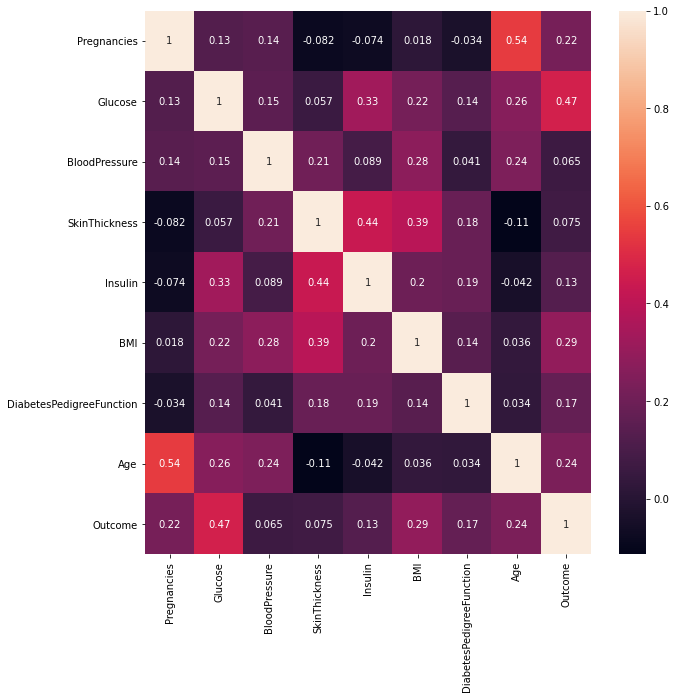

In [10]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot = True)

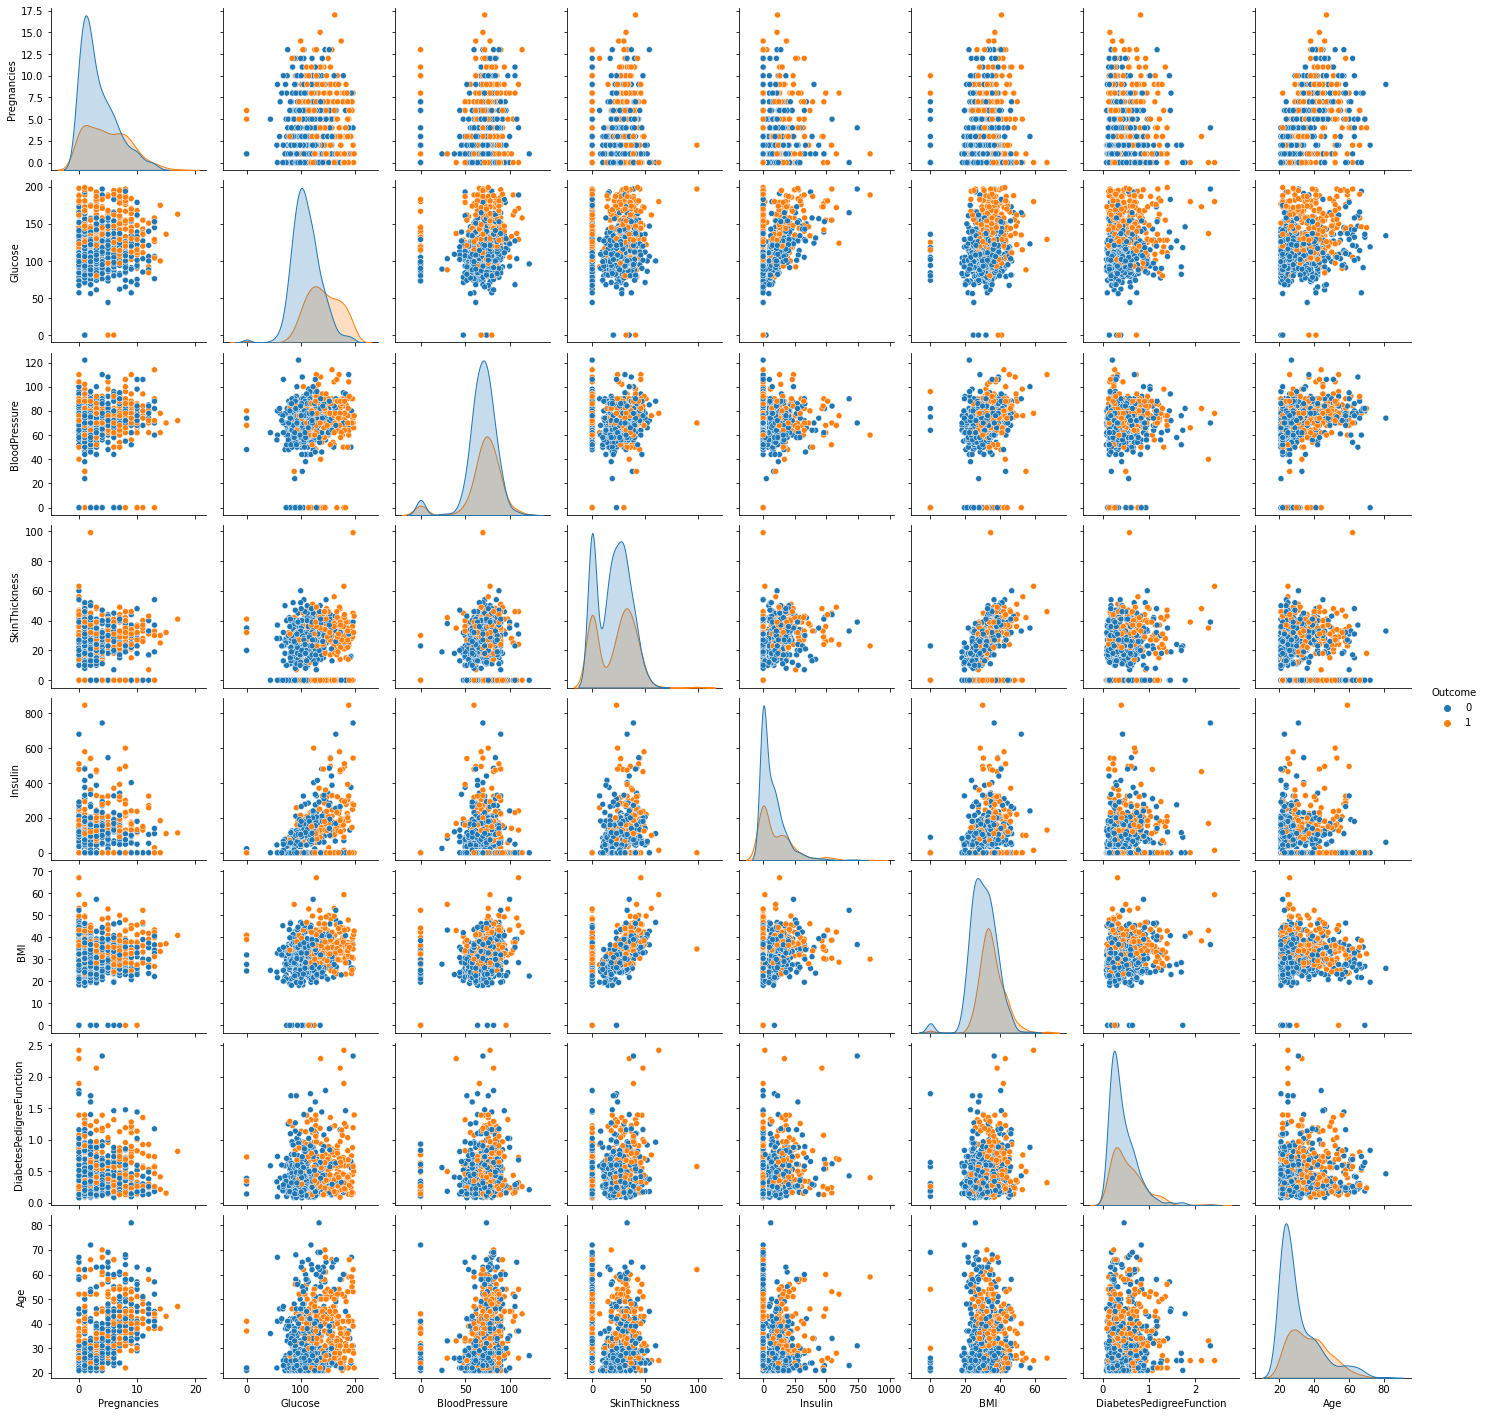

In [11]:
# Paiplot of cancer dataframe
sns.pairplot(data, hue = 'Outcome') 

In [12]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [13]:
outlier_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']

def outlier_finding():
    for col in outlier_columns:
        IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
        print(col,':')
        print('IQR value of ', col,' is = ',IQR)

        lower_fence = data[col].quantile(0.25) - (IQR*1.5)
        upper_fence = data[col].quantile(0.75) + (IQR*1.5)
        print(f'for normal cases, lower fence = {lower_fence} and upper_fence = {upper_fence}')
       
    # outlier count
        outlier_count = data[(data[col] < lower_fence) | (data[col] > upper_fence)].shape[0]
        print(f'\toutlier count within normal range for {col} is {outlier_count} and its % = {round(outlier_count / data.shape[0]*100, 2)}%\n')
        

    # for extreme values
        lower_fence_extreme = data[col].quantile(0.25) - (IQR*3)
        upper_fence_extreme = data[col].quantile(0.75) + (IQR*3)
        print(f'for extreme cases, lower fence = {lower_fence_extreme} and upper_fence = {upper_fence_extreme}')
        
    # outlier count
        outlier_count_extreme = data[(data[col] < lower_fence_extreme) | 
                                      (data[col] > upper_fence_extreme)].shape[0]
        print(f'\toutlier count within extreme range for {col} is {outlier_count_extreme} and its % = {round(outlier_count_extreme / data.shape[0]*100, 2)}%\n\n')


In [14]:
outlier_finding()

Pregnancies :
IQR value of  Pregnancies  is =  5.0
for normal cases, lower fence = -6.5 and upper_fence = 13.5
	outlier count within normal range for Pregnancies is 4 and its % = 0.52%

for extreme cases, lower fence = -14.0 and upper_fence = 21.0
	outlier count within extreme range for Pregnancies is 0 and its % = 0.0%


Glucose :
IQR value of  Glucose  is =  41.25
for normal cases, lower fence = 37.125 and upper_fence = 202.125
	outlier count within normal range for Glucose is 5 and its % = 0.65%

for extreme cases, lower fence = -24.75 and upper_fence = 264.0
	outlier count within extreme range for Glucose is 0 and its % = 0.0%


BloodPressure :
IQR value of  BloodPressure  is =  18.0
for normal cases, lower fence = 35.0 and upper_fence = 107.0
	outlier count within normal range for BloodPressure is 45 and its % = 5.86%

for extreme cases, lower fence = 8.0 and upper_fence = 134.0
	outlier count within extreme range for BloodPressure is 35 and its % = 4.56%


SkinThickness :
IQR val

<AxesSubplot:>

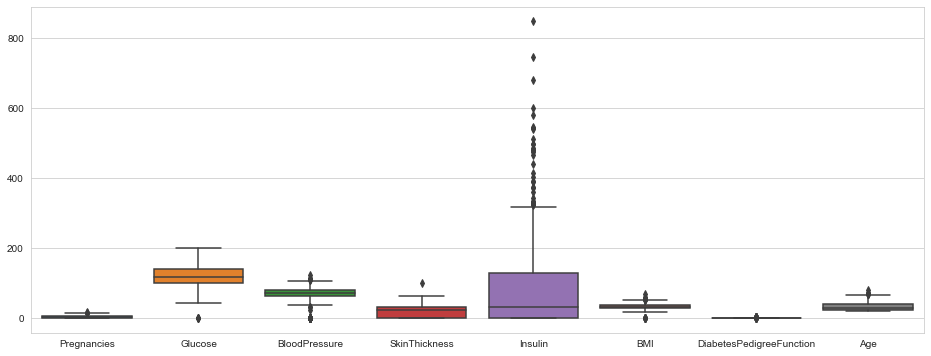

In [15]:
sns.set_style("whitegrid")
plt.figure(figsize=(16, 6))
sns.boxplot(data=data.drop(['Outcome'], axis =1))

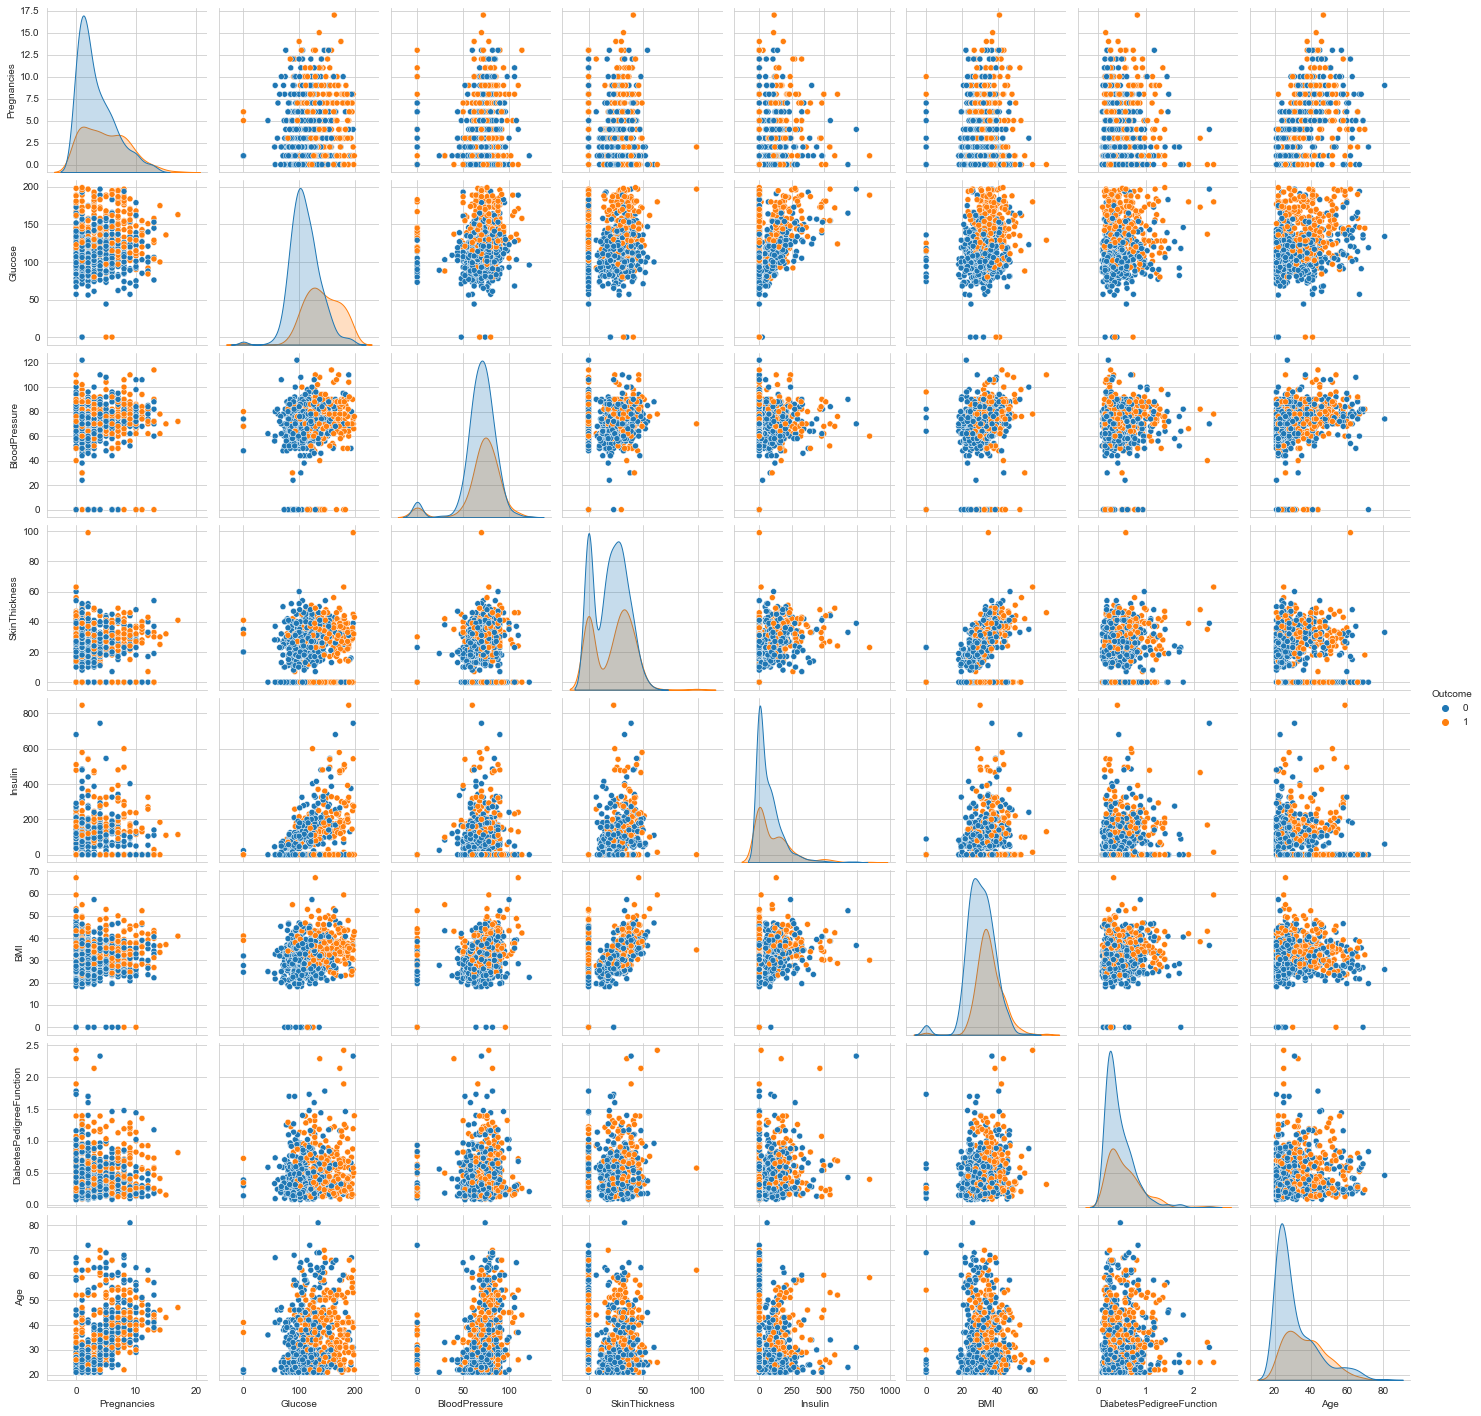

In [16]:
# pair plot of sample feature
sns.pairplot(data, hue = 'Outcome', 
             vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'] ) 

C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Outcome', ylabel='count'>

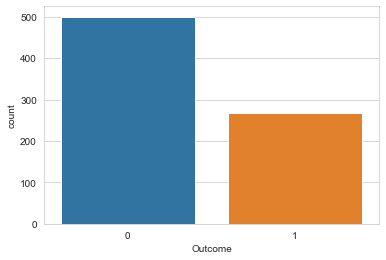

In [17]:
# Count the target class
sns.countplot(data['Outcome'])

C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='count'>

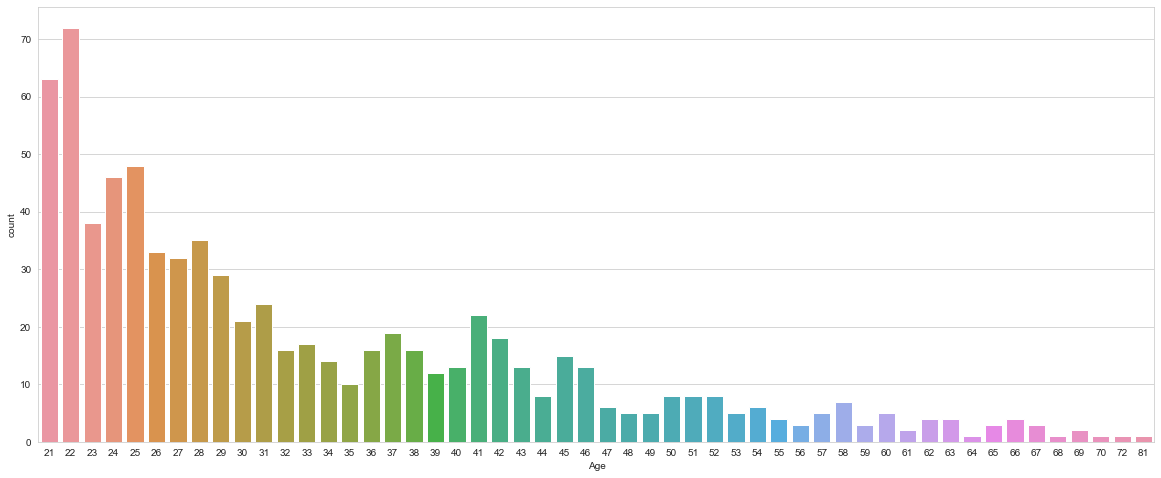

In [18]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(data['Age'])

C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pregnancies', ylabel='count'>

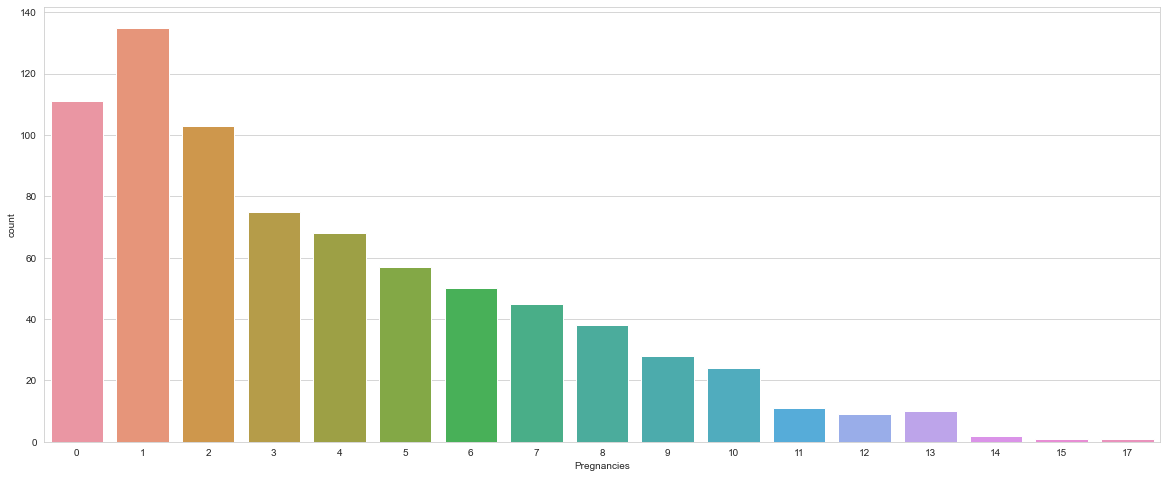

In [19]:
# counter plot of feature mean radius
plt.figure(figsize = (20,8))
sns.countplot(data['Pregnancies'])

<AxesSubplot:>

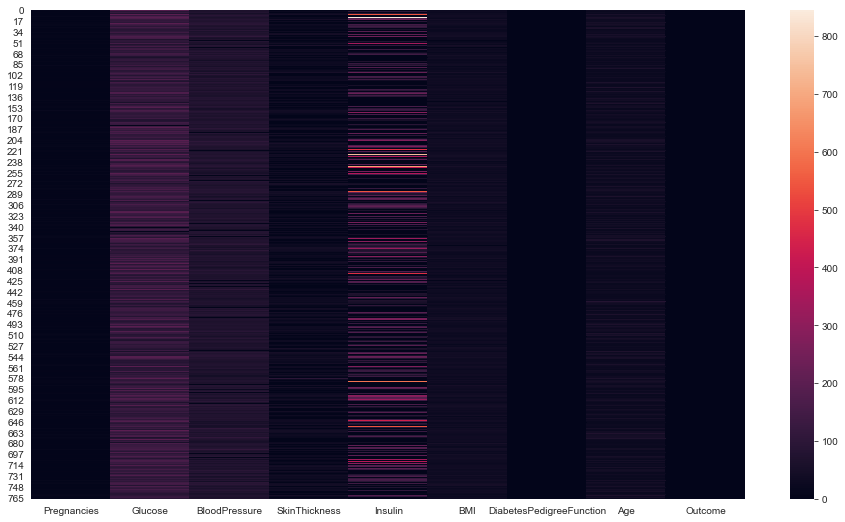

In [20]:
# heatmap of DataFrame
plt.figure(figsize=(16,9))
sns.heatmap(data)

<AxesSubplot:>

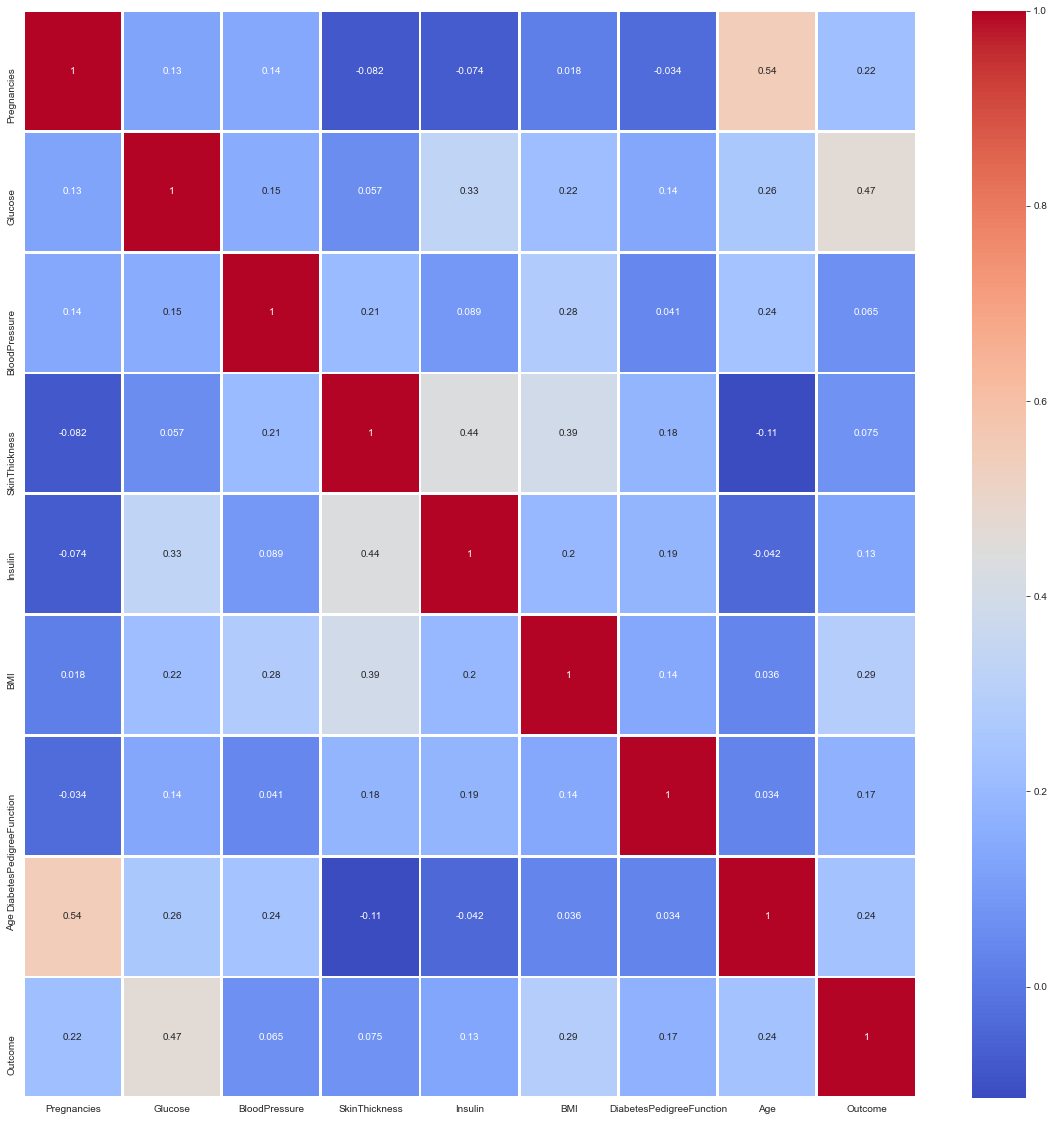

In [21]:
# Heatmap of Correlation matrix of breast cancer DataFrame
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(), annot = True, cmap ='coolwarm', linewidths=2)

# Correlation Barplot

In [22]:
# create second DataFrame by droping target
data2 = data.drop(['Outcome'], axis = 1)
print("The shape of 'cancer_df2' is : ", data2.shape)

The shape of 'cancer_df2' is :  (768, 8)


C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


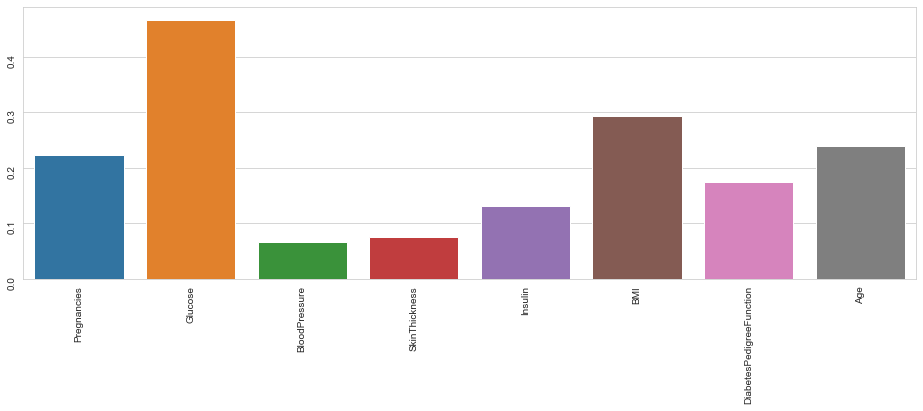

In [23]:
# visualize correlation barplot
plt.figure(figsize = (16,5))
ax = sns.barplot(data2.corrwith(data.Outcome).index, data2.corrwith(data.Outcome))
ax.tick_params(labelrotation = 90) 

In [24]:
# find numerical variables

numerical = [var for var in data.columns if data[var].dtype!='O']

print('There are {} numerical variables\n'.format(len(numerical)))

print('The numerical variables are :', numerical)

There are 9 numerical variables

The numerical variables are : ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']


C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\mysore\anaconda3\li

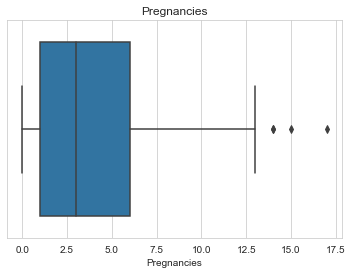

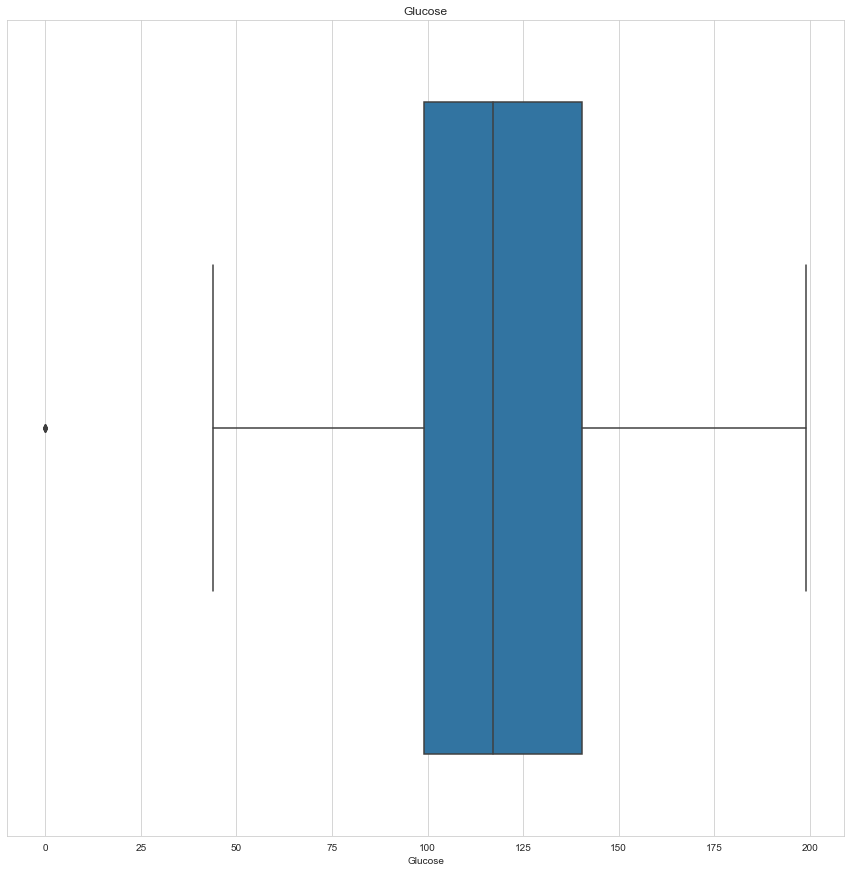

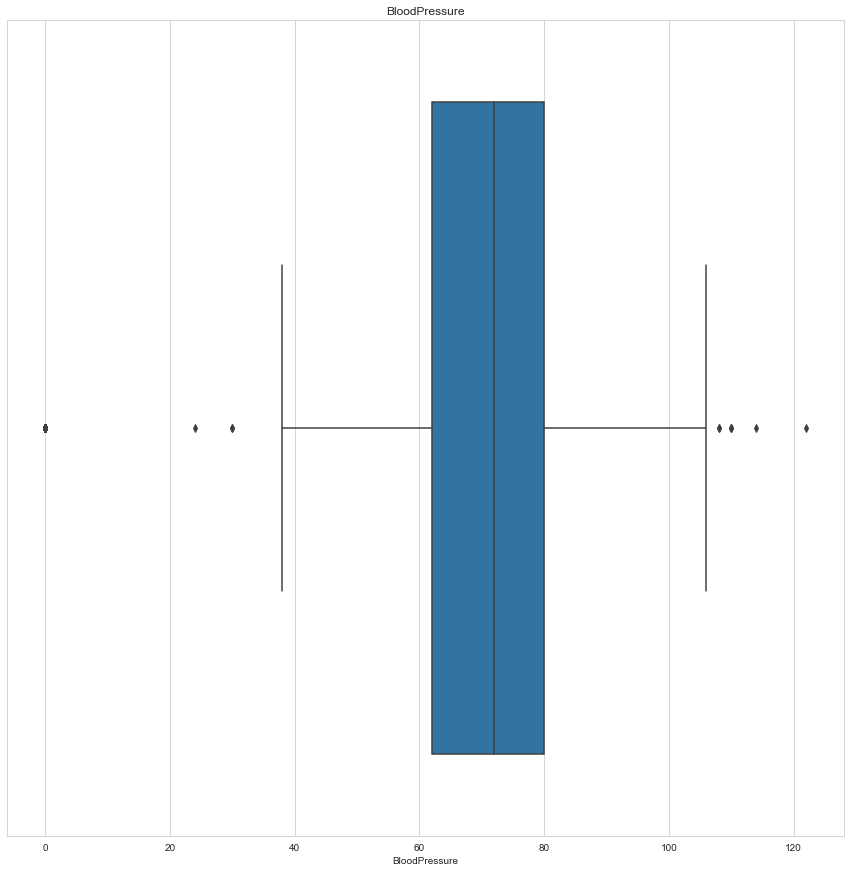

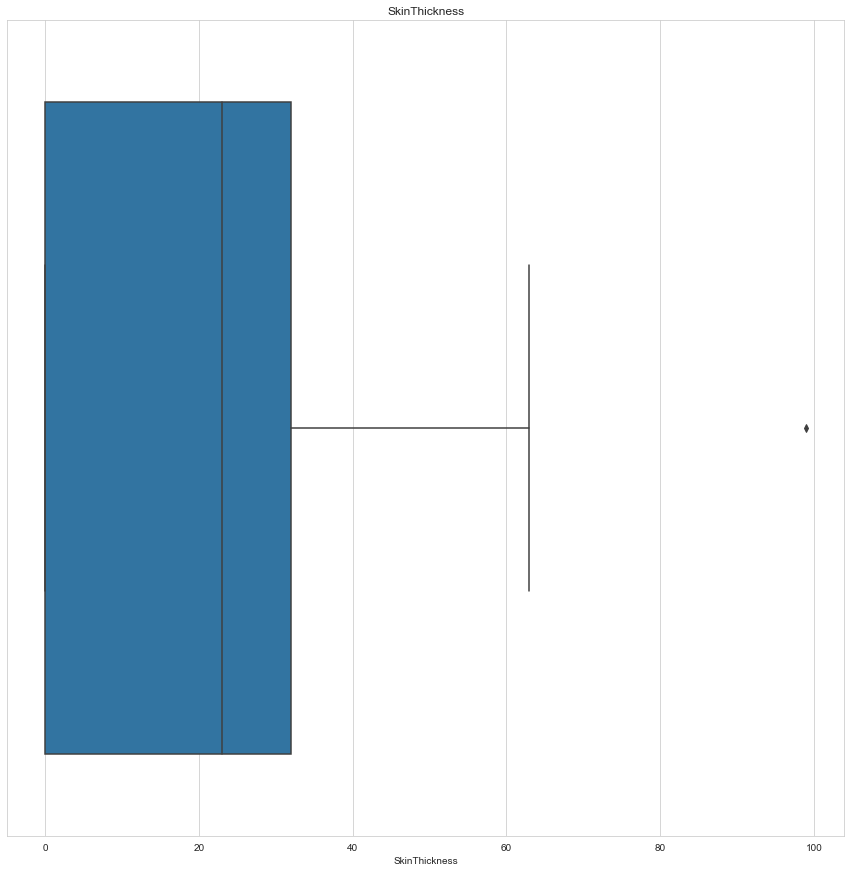

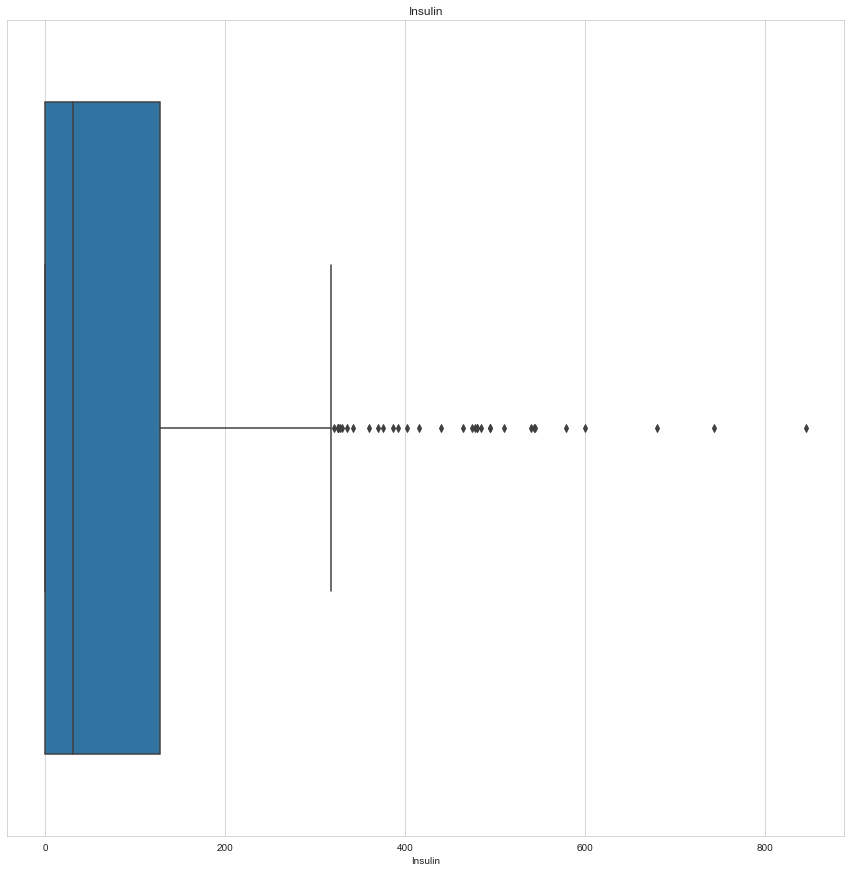

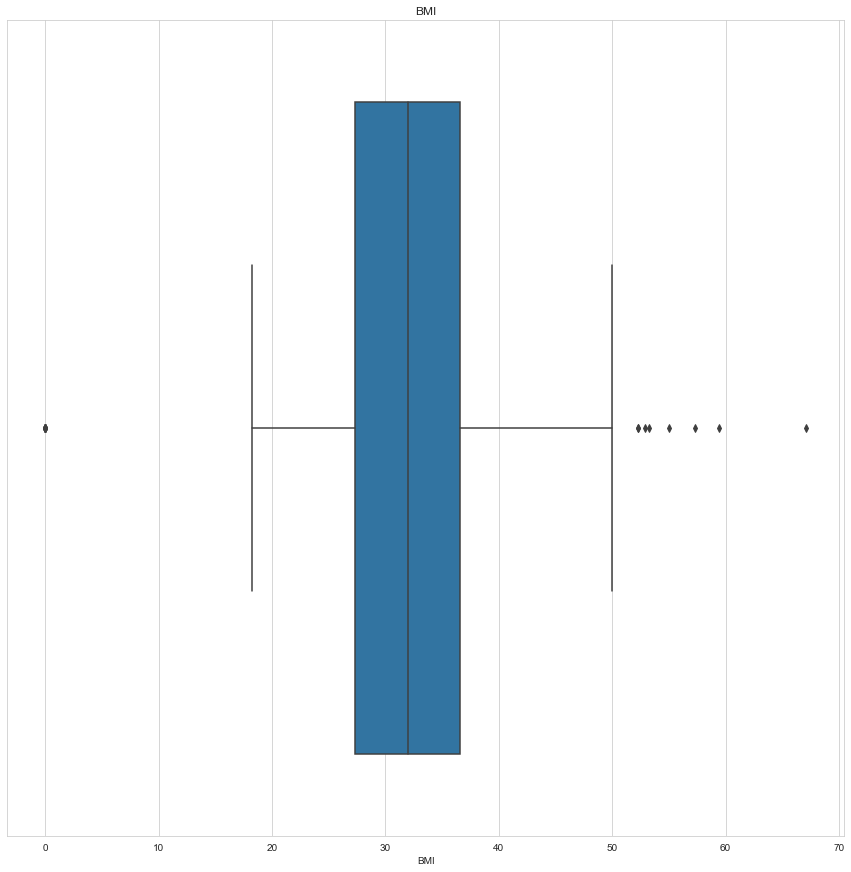

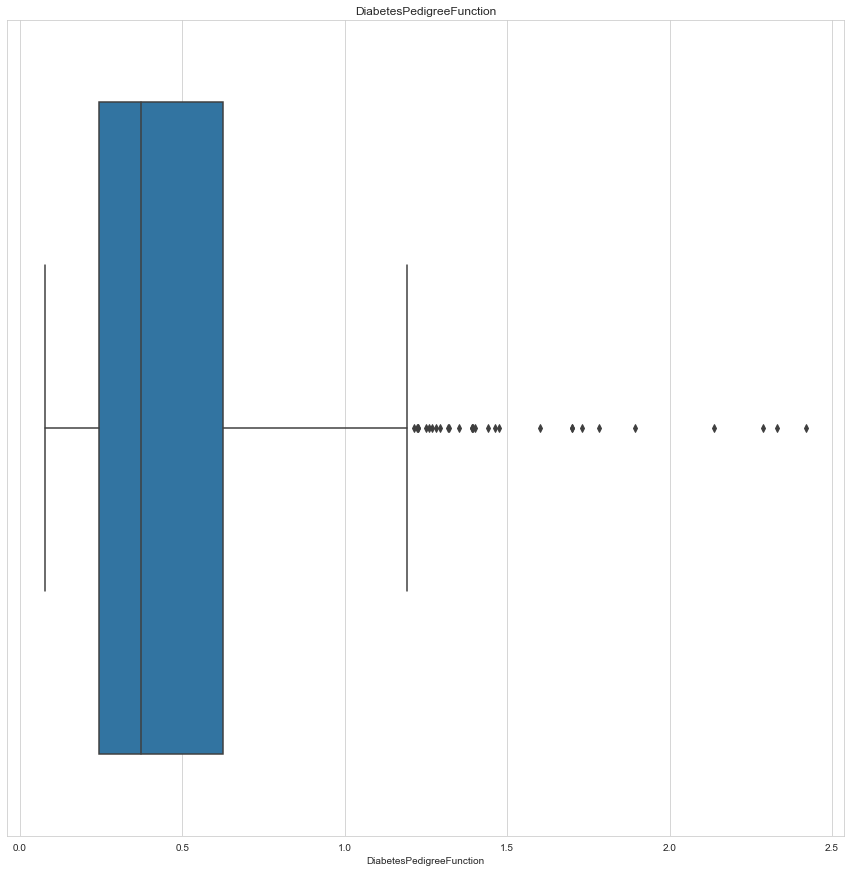

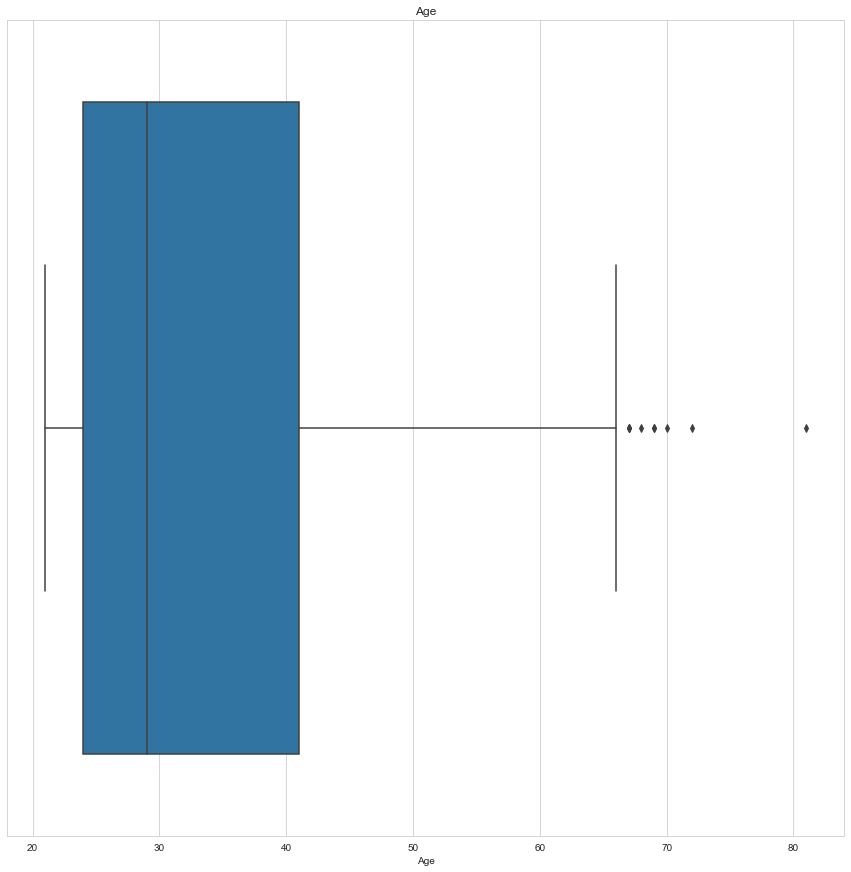

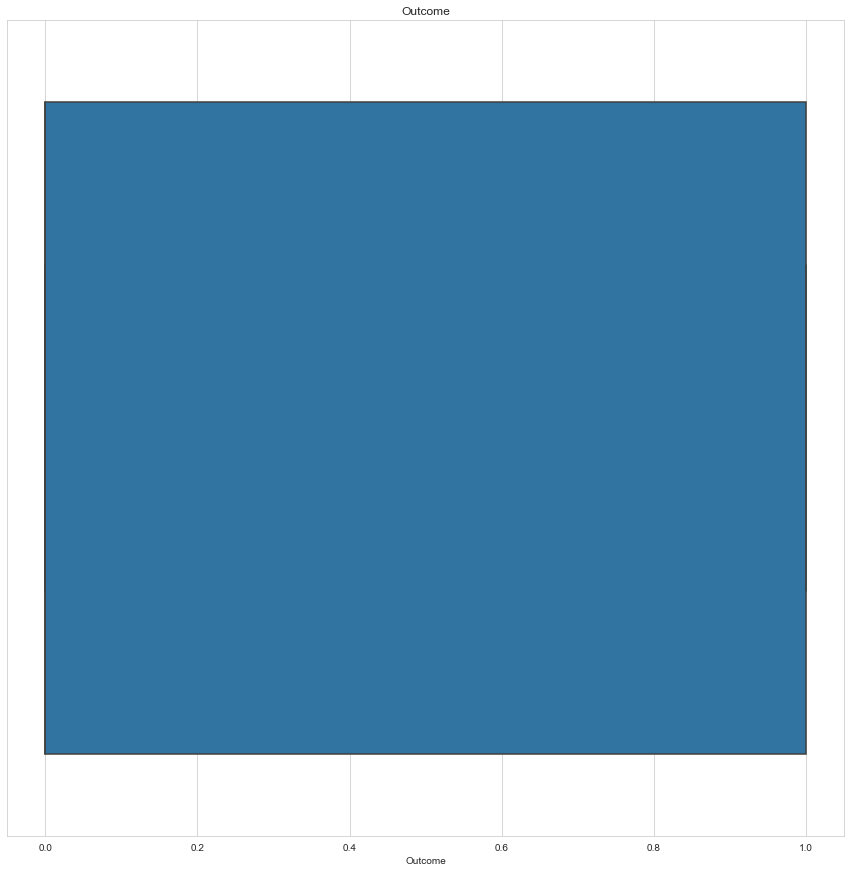

<Figure size 1080x1080 with 0 Axes>

In [25]:
for feature in numerical:
    data=data.copy()
    sns.boxplot(data[feature])
    plt.title(feature)
    plt.figure(figsize=(15,15))

In [26]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [27]:
# find outliers for Rainfall variable

IQR = data.Pregnancies.quantile(0.75) - data.Pregnancies.quantile(0.25)
Lower_fence = data.Pregnancies.quantile(0.25) - (IQR * 3)
Upper_fence = data.Pregnancies.quantile(0.75) + (IQR * 3)
print('Pregnancies outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Pregnancies outliers are values < -14.0 or > 21.0


In [28]:
# find outliers for Rainfall variable

IQR = data.Glucose.quantile(0.75) - data.Glucose.quantile(0.25)
Lower_fence = data.Glucose.quantile(0.25) - (IQR * 3)
Upper_fence = data.Glucose.quantile(0.75) + (IQR * 3)
print('Pregnancies outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Pregnancies outliers are values < -24.75 or > 264.0


In [29]:
# find outliers for Rainfall variable

IQR = data.BloodPressure.quantile(0.75) - data.BloodPressure.quantile(0.25)
Lower_fence = data.BloodPressure.quantile(0.25) - (IQR * 3)
Upper_fence = data.BloodPressure.quantile(0.75) + (IQR * 3)
print('BloodPressure outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

BloodPressure outliers are values < 8.0 or > 134.0


In [30]:
# find outliers for Rainfall variable

IQR = data.SkinThickness.quantile(0.75) - data.SkinThickness.quantile(0.25)
Lower_fence = data.SkinThickness.quantile(0.25) - (IQR * 3)
Upper_fence = data.SkinThickness.quantile(0.75) + (IQR * 3)
print('Glucose outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Glucose outliers are values < -96.0 or > 128.0


In [31]:
# find outliers for Rainfall variable

IQR = data.Insulin.quantile(0.75) - data.Insulin.quantile(0.25)
Lower_fence = data.Insulin.quantile(0.25) - (IQR * 3)
Upper_fence = data.Insulin.quantile(0.75) + (IQR * 3)
print('Insulin outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Insulin outliers are values < -381.75 or > 509.0


In [32]:
# find outliers for Rainfall variable

IQR = data.BMI.quantile(0.75) - data.BMI.quantile(0.25)
Lower_fence = data.BMI.quantile(0.25) - (IQR * 3)
Upper_fence = data.BMI.quantile(0.75) + (IQR * 3)
print('BMI outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

BMI outliers are values < -0.6000000000000014 or > 64.5


In [33]:
# find outliers for Rainfall variable

IQR = data.DiabetesPedigreeFunction.quantile(0.75) - data.DiabetesPedigreeFunction.quantile(0.25)
Lower_fence = data.DiabetesPedigreeFunction.quantile(0.25) - (IQR * 3)
Upper_fence = data.DiabetesPedigreeFunction.quantile(0.75) + (IQR * 3)
print('Glucose outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Glucose outliers are values < -0.9037499999999999 or > 1.77375


In [34]:
# find outliers for Rainfall variable

IQR = data.Age.quantile(0.75) - data.Age.quantile(0.25)
Lower_fence = data.Age.quantile(0.25) - (IQR * 3)
Upper_fence = data.Age.quantile(0.75) + (IQR * 3)
print('Age outliers are values < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

Age outliers are values < -27.0 or > 92.0


In [35]:
# input variable
X = data.drop(['Outcome'], axis = 1) 
X.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [36]:
# output variable
y = data['Outcome'] 
y.head(5)

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [37]:
# split dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 5)

In [38]:
X_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
140,3,128,78,0,0,21.1,0.268,55
358,12,88,74,40,54,35.3,0.378,48
143,10,108,66,0,0,32.4,0.272,42
674,8,91,82,0,0,35.6,0.587,68
121,6,111,64,39,0,34.2,0.260,24
...,...,...,...,...,...,...,...,...
73,4,129,86,20,270,35.1,0.231,23
400,4,95,64,0,0,32.0,0.161,31
118,4,97,60,23,0,28.2,0.443,22
701,6,125,78,31,0,27.6,0.565,49


In [39]:
X_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
567,6,92,62,32,126,32.0,0.085,46
123,5,132,80,0,0,26.8,0.186,69
615,3,106,72,0,0,25.8,0.207,27
492,4,99,68,38,0,32.8,0.145,33
288,4,96,56,17,49,20.8,0.340,26
...,...,...,...,...,...,...,...,...
432,1,80,74,11,60,30.0,0.527,22
480,3,158,70,30,328,35.5,0.344,35
7,10,115,0,0,0,35.3,0.134,29
564,0,91,80,0,0,32.4,0.601,27


In [40]:
# display numerical variables

numerical = [col for col in X_train.columns if X_train[col].dtypes != 'O']

numerical

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [41]:
# check missing values in numerical variables in X_train

X_train[numerical].isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

In [42]:
# check missing values in numerical variables in X_test

X_test[numerical].isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64

# Engineering outliers in numerical variables

In [43]:
X_train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'],
      dtype='object')

In [44]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Pregnancies'] = max_value(df3, 'Pregnancies', 21.0)
    df3['Glucose'] = max_value(df3, 'Glucose', 264.0)
    df3['BloodPressure'] = max_value(df3, 'BloodPressure', 134.0)
    df3['SkinThickness'] = max_value(df3, 'SkinThickness', 128.0)
    df3['Insulin'] = max_value(df3, 'Insulin', 509.0)
    df3['BMI'] = max_value(df3, 'BMI', 64.5)
    df3['DiabetesPedigreeFunction'] = max_value(df3, 'DiabetesPedigreeFunction', 1.77)
    df3['Age'] = max_value(df3, 'Age', 92.0)

<ipython-input-44-6d077503cbe8>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Pregnancies'] = max_value(df3, 'Pregnancies', 21.0)
<ipython-input-44-6d077503cbe8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Glucose'] = max_value(df3, 'Glucose', 264.0)
<ipython-input-44-6d077503cbe8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

In [45]:
X_train.Pregnancies.max(), X_test.Pregnancies.max()

(15.0, 17.0)

In [46]:
X_train.Glucose.max(), X_test.Glucose.max()

(199.0, 198.0)

In [47]:
X_train.BloodPressure.max(), X_test.BloodPressure.max()

(122.0, 108.0)

In [48]:
X_train.SkinThickness.max(), X_test.SkinThickness.max()

(99.0, 63.0)

In [49]:
X_train.Insulin.max(), X_test.Insulin.max()

(509.0, 509.0)

In [50]:
X_train.BMI.max(), X_test.BMI.max()

(64.5, 59.4)

In [51]:
X_train.DiabetesPedigreeFunction.max(), X_test.DiabetesPedigreeFunction.max()

(1.77, 1.77)

In [52]:
X_train.Age.max(), X_test.Age.max()

(81.0, 69.0)

In [53]:
X_train.shape

(614, 8)

# Feature scaling

In [54]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

# Suppor vector Classifier

In [56]:
# Support vector classifier
from sklearn.svm import SVC
svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred_scv = svc_classifier.predict(X_test)
accuracy_score(y_test, y_pred_scv)

0.7532467532467533

In [57]:
# Train with Standard scaled Data
svc_classifier2 = SVC()
svc_classifier2.fit(X_train_sc, y_train)
y_pred_svc_sc = svc_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_svc_sc)

0.7727272727272727

# K – Nearest Neighbor Classifier

In [58]:
# K – Nearest Neighbor Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier.fit(X_train, y_train)
y_pred_knn = knn_classifier.predict(X_test)
accuracy_score(y_test, y_pred_knn)

0.7207792207792207

In [59]:
# Train with Standard scaled Data
knn_classifier2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_classifier2.fit(X_train_sc, y_train)
y_pred_knn_sc = knn_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_knn_sc)

0.6493506493506493

# Naive Bayes Classifier

In [60]:
# Naive Bayes Classifier
from sklearn.naive_bayes import GaussianNB
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
y_pred_nb = nb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_nb)

0.7662337662337663

In [61]:
# Train with Standard scaled Data
nb_classifier2 = GaussianNB()
nb_classifier2.fit(X_train_sc, y_train)
y_pred_nb_sc = nb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_nb_sc)

0.7662337662337663

# Decision Tree Classifier

In [62]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier.fit(X_train, y_train)
y_pred_dt = dt_classifier.predict(X_test)
accuracy_score(y_test, y_pred_dt)

0.7142857142857143

In [63]:
# Train with Standard scaled Data
dt_classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 51)
dt_classifier2.fit(X_train_sc, y_train)
y_pred_dt_sc = dt_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_dt_sc)

0.6493506493506493

# Random Forest Classifier

In [64]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
accuracy_score(y_test, y_pred_rf)

0.8116883116883117

In [65]:
accuracy_score(y_test, y_pred_rf)

0.8116883116883117

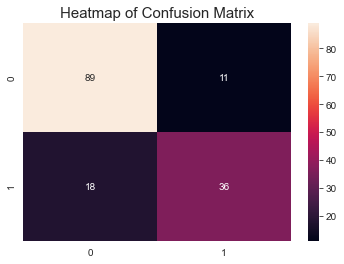

In [66]:
cm = confusion_matrix(y_test, y_pred_rf)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

In [67]:
# Train with Standard scaled Data
rf_classifier2 = RandomForestClassifier(n_estimators = 20, criterion = 'entropy', random_state = 51)
rf_classifier2.fit(X_train_sc, y_train)
y_pred_rf_sc = rf_classifier.predict(X_test_sc)
accuracy_score(y_test, y_pred_rf_sc)

0.6493506493506493

# AdaBoost Classifier

In [68]:
# Adaboost Classifier
from sklearn.ensemble import AdaBoostClassifier
adb_classifier = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier.fit(X_train, y_train)
y_pred_adb = adb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_adb)

0.6753246753246753

In [69]:
# Train with Standard scaled Data
adb_classifier2 = AdaBoostClassifier(DecisionTreeClassifier(criterion = 'entropy', random_state = 200),
                                    n_estimators=2000,
                                    learning_rate=0.1,
                                    algorithm='SAMME.R',
                                    random_state=1,)
adb_classifier2.fit(X_train_sc, y_train)
y_pred_adb_sc = adb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_adb_sc)

0.6753246753246753

# XGBoost Classifier

In [70]:
# XGBoost Classifier
from xgboost import XGBClassifier
xgb_classifier = XGBClassifier()
xgb_classifier.fit(X_train, y_train)
y_pred_xgb = xgb_classifier.predict(X_test)
accuracy_score(y_test, y_pred_xgb)

C:\Users\mysore\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:00] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7857142857142857

In [71]:
# Train with Standard scaled Data
xgb_classifier2 = XGBClassifier()
xgb_classifier2.fit(X_train_sc, y_train)
y_pred_xgb_sc = xgb_classifier2.predict(X_test_sc)
accuracy_score(y_test, y_pred_xgb_sc)

[21:18:01] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7857142857142857

# XGBoost Parameter Tuning Randomized Search

In [72]:
params={
 "learning_rate"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
 "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
 "min_child_weight" : [ 1, 3, 5, 7 ],
 "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
 "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ] 
}

In [73]:
# Randomized Search
from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(xgb_classifier, param_distributions=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    7.8s finished
C:\Users\mysore\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[21:18:09] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                           colsample_bylevel=1,
                                           colsample_bynode=1,
                                           colsample_bytree=1, gamma=0,
                                           gpu_id=-1, importance_type='gain',
                                           interaction_constraints='',
                                           learning_rate=0.300000012,
                                           max_delta_step=0, max_depth=6,
                                           min_child_weight=1, missing=nan,
                                           monotone_constraints='()',
                                           n_estimators=100, n_jobs=4,
                                           num_paralle...0,
                                           reg_alpha=0, reg_lambda=1,
                                           scale_pos_weight=1, subsample=1,
        

In [74]:
random_search.best_params_

{'min_child_weight': 3,
 'max_depth': 8,
 'learning_rate': 0.05,
 'gamma': 0.4,
 'colsample_bytree': 0.7}

In [75]:
random_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.4, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=3, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
# training XGBoost classifier with best parameters
xgb_classifier_pt = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
       learning_rate=0.1, max_delta_step=0, max_depth=15,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)

xgb_classifier_pt.fit(X_train, y_train)
y_pred_xgb_pt = xgb_classifier_pt.predict(X_test)

[21:18:09] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [77]:
accuracy_score(y_test, y_pred_xgb_pt)

0.7727272727272727

# Grid Search

In [78]:
from sklearn.model_selection import GridSearchCV 
grid_search = GridSearchCV(xgb_classifier, param_grid=params, scoring= 'roc_auc', n_jobs= -1, verbose= 3)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 3840 candidates, totalling 19200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:    8.3s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:   22.9s
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed:   37.9s
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:   57.3s
[Parallel(n_jobs=-1)]: Done 1144 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 1560 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2040 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 2584 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 3192 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 3864 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 4600 tasks      | elapsed:  5.6min
[Parallel(n_jobs=-1)]: Done 5400 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 6264 tasks      | elapsed:  7.5min
[Parallel(n_jobs=-1)]: Done 7192 tasks      | e

[14:07:00] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0, gpu_id=-1,
                                     importance_type='gain',
                                     interaction_constraints='',
                                     learning_rate=0.300000012,
                                     max_delta_step=0, max_depth=6,
                                     min_child_weight=1, missing=nan,
                                     monotone_constraints='()',
                                     n_estimators=100, n_jobs=4,
                                     num_parallel_tree...om_state=0,
                                     reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, subsample=1,
                                     tree_method='exact', validate_parameters=1,
                                 

In [79]:
grid_search.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0.0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=4,
              min_child_weight=5, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [80]:
xgb_classifier_pt_gs = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.5, gamma=0.2,
       learning_rate=0.3, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
       nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=None, subsample=1, verbosity=1)
xgb_classifier_pt_gs.fit(X_train, y_train)
y_pred_xgb_pt_gs = xgb_classifier_pt_gs.predict(X_test)
accuracy_score(y_test, y_pred_xgb_pt_gs)

[14:07:01] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


0.7857142857142857

# Confusion Matrix

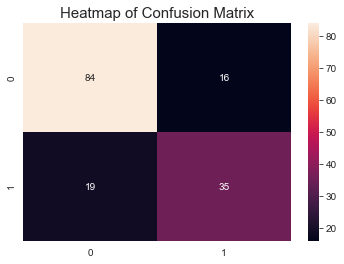

In [81]:
cm = confusion_matrix(y_test, y_pred_xgb_pt)
plt.title('Heatmap of Confusion Matrix', fontsize = 15)
sns.heatmap(cm, annot = True)
plt.show()

# Classification Report Of model

In [82]:
print(classification_report(y_test, y_pred_xgb_pt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       100
           1       0.69      0.65      0.67        54

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.75       154
weighted avg       0.77      0.77      0.77       154



# Cross-validation of the ML model

In [83]:
# Cross validation
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = xgb_classifier_pt, X = X_train_sc,y = y_train, cv = 10)
print("Cross validation accuracy of XGBoost model = ", cross_validation)
print("\nCross validation mean accuracy of XGBoost model = ", cross_validation.mean())

C:\Users\mysore\anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[14:07:02] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:02] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:02] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[14:07:03] WARNING: D:\Build\xgboost\xgboost-1.3.1.git\src\learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the o

In [84]:
## Pickle
import pickle

# save model
pickle.dump(xgb_classifier_pt, open('breast_cancer_detector.pickle', 'wb'))

# load model
breast_cancer_detector_model = pickle.load(open('breast_cancer_detector.pickle', 'rb'))

# predict the output
y_pred = breast_cancer_detector_model.predict(X_test)

# confusion matrix
print('Confusion matrix of XGBoost model: \n',confusion_matrix(y_test, y_pred),'\n')

# show the accuracy
print('Accuracy of XGBoost model = ',accuracy_score(y_test, y_pred))

Confusion matrix of XGBoost model: 
 [[84 16]
 [19 35]] 

Accuracy of XGBoost model =  0.7727272727272727


In [85]:
# train a logistic regression model on the training set
from sklearn.linear_model import LogisticRegression


# instantiate the model
logreg = LogisticRegression(solver='liblinear', random_state=0)


# fit the model
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

In [93]:
y_pred_test = logreg.predict(X_test)

y_pred_test

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1],
      dtype=int64)

In [94]:
# probability of getting output as 0 - no rain

logreg.predict_proba(X_test)[:,0]

array([0.78796247, 0.65770752, 0.8602836 , 0.82143431, 0.86687197,
       0.82009674, 0.53990626, 0.37481704, 0.52227783, 0.55627423,
       0.97215882, 0.6544135 , 0.25334084, 0.73580312, 0.86636513,
       0.89986159, 0.88462608, 0.4417962 , 0.68642795, 0.9038174 ,
       0.74524579, 0.33915326, 0.88819895, 0.47819874, 0.98794439,
       0.7719001 , 0.58680347, 0.56766057, 0.93509511, 0.47543594,
       0.94056864, 0.76498013, 0.64769822, 0.83882875, 0.42451299,
       0.77442636, 0.70516636, 0.61165226, 0.89595951, 0.94453704,
       0.68623227, 0.68012982, 0.69204687, 0.39179181, 0.71671971,
       0.06930179, 0.31765061, 0.87719015, 0.59694565, 0.62605739,
       0.37006152, 0.87942142, 0.2186884 , 0.69670914, 0.72580308,
       0.62475405, 0.68444588, 0.88859666, 0.26433528, 0.85619189,
       0.48562825, 0.46023943, 0.20375112, 0.87625219, 0.53276862,
       0.54503834, 0.85472385, 0.54695141, 0.27950341, 0.77395645,
       0.14606998, 0.82315795, 0.83693063, 0.2826525 , 0.17482

In [95]:
# probability of getting output as 1 - rain

logreg.predict_proba(X_test)[:,1]

array([0.21203753, 0.34229248, 0.1397164 , 0.17856569, 0.13312803,
       0.17990326, 0.46009374, 0.62518296, 0.47772217, 0.44372577,
       0.02784118, 0.3455865 , 0.74665916, 0.26419688, 0.13363487,
       0.10013841, 0.11537392, 0.5582038 , 0.31357205, 0.0961826 ,
       0.25475421, 0.66084674, 0.11180105, 0.52180126, 0.01205561,
       0.2280999 , 0.41319653, 0.43233943, 0.06490489, 0.52456406,
       0.05943136, 0.23501987, 0.35230178, 0.16117125, 0.57548701,
       0.22557364, 0.29483364, 0.38834774, 0.10404049, 0.05546296,
       0.31376773, 0.31987018, 0.30795313, 0.60820819, 0.28328029,
       0.93069821, 0.68234939, 0.12280985, 0.40305435, 0.37394261,
       0.62993848, 0.12057858, 0.7813116 , 0.30329086, 0.27419692,
       0.37524595, 0.31555412, 0.11140334, 0.73566472, 0.14380811,
       0.51437175, 0.53976057, 0.79624888, 0.12374781, 0.46723138,
       0.45496166, 0.14527615, 0.45304859, 0.72049659, 0.22604355,
       0.85393002, 0.17684205, 0.16306937, 0.7173475 , 0.82517

In [96]:
from sklearn.metrics import accuracy_score

print('Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score: 0.7857


In [97]:
y_pred_train = logreg.predict(X_train)

y_pred_train

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,

In [98]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.7704


In [99]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg.score(X_test, y_test)))

Training set score: 0.7704
Test set score: 0.7857


In [100]:
# fit the Logsitic Regression model with C=100

# instantiate the model
logreg100 = LogisticRegression(C=100, solver='liblinear', random_state=0)


# fit the model
logreg100.fit(X_train, y_train)

LogisticRegression(C=100, random_state=0, solver='liblinear')

In [101]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg100.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg100.score(X_test, y_test)))

Training set score: 0.7801
Test set score: 0.7987


In [102]:
# fit the Logsitic Regression model with C=001

# instantiate the model
logreg001 = LogisticRegression(C=0.01, solver='liblinear', random_state=0)


# fit the model
logreg001.fit(X_train, y_train)

LogisticRegression(C=0.01, random_state=0, solver='liblinear')

In [103]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(logreg001.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(logreg001.score(X_test, y_test)))

Training set score: 0.6873
Test set score: 0.7078


In [104]:
# check class distribution in test set

y_test.value_counts()

0    100
1     54
Name: Outcome, dtype: int64

In [105]:
# check null accuracy score

null_accuracy = (100/(100+54))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.6494


In [106]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_test)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[1,1])

print('\nFalse Positives(FP) = ', cm[0,1])

print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[88 12]
 [21 33]]

True Positives(TP) =  88

True Negatives(TN) =  33

False Positives(FP) =  12

False Negatives(FN) =  21


<AxesSubplot:>

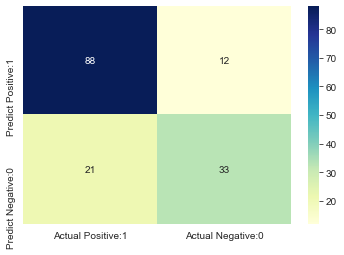

In [107]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [108]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.84       100
           1       0.73      0.61      0.67        54

    accuracy                           0.79       154
   macro avg       0.77      0.75      0.75       154
weighted avg       0.78      0.79      0.78       154



In [109]:
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [110]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.7857


In [111]:
# print classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

print('Classification error : {0:0.4f}'.format(classification_error))

Classification error : 0.2143


In [112]:
# print precision score

precision = TP / float(TP + FP)


print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8800


In [79]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=20)
model.fit(X_train, y_train)

RandomForestClassifier(n_estimators=20)

In [80]:
from sklearn.metrics import accuracy_score

In [81]:
print(accuracy_score(y_test, model.predict(X_test))*100)

75.32467532467533


In [82]:
import pickle

In [83]:
pickle.dump(model, open("diabetes.pkl",'wb'))